In [1]:
from swebench_utils import build_swebench_images
from datasets import load_dataset

DATASET_ID = "princeton-nlp/SWE-bench_Lite"
# DATASET_ID = "princeton-nlp/SWE-bench_Multimodal"
SPLIT = "test"
INSTANCE_ID = "astropy__astropy-12907"
RUN_ID = "v0"

# base -> environment -> instance images
build_swebench_images(
    DATASET_ID, SPLIT,
    instance_ids=[INSTANCE_ID],
    tag="latest"
)

dataset = load_dataset(DATASET_ID, split=SPLIT)
instance_details = [r for r in dataset if r["instance_id"] == INSTANCE_ID][0]

Base image sweb.base.py.x86_64:latest already exists, skipping build.
Base images built successfully.
No environment images need to be built.
Building instance images for 1 instances


1 ran successfully, 0 failed: 100%|██████████| 1/1 [00:00<00:00, 232.86it/s]

All instance images built successfully.


In [2]:
# create environment
from environment import Environment
from code_index import CodeIndex
from editor import Editor
from swebench.harness.test_spec.test_spec import make_test_spec
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

test_spec = make_test_spec(instance_details)
env = Environment.from_test_spec(
    test_spec=test_spec,
    run_id=RUN_ID,
    # timeout=3,
)


code_index = CodeIndex(instance_details)
code_editor = Editor(env, instance_details, code_index)

14:43:03,781 environment INFO Container sweb.eval.astropy__astropy-12907.v0 already exists. Removing and re-creating.


2025-01-30 14:43:03,781 - environment - INFO - Container sweb.eval.astropy__astropy-12907.v0 already exists. Removing and re-creating.


14:43:03,925 environment INFO Running container: sweb.eval.astropy__astropy-12907.v0


2025-01-30 14:43:03,925 - environment - INFO - Running container: sweb.eval.astropy__astropy-12907.v0


14:43:03,927 environment INFO Environment image sweb.env.py.x86_64.428468730904ff6b4232aa:latest found for astropy__astropy-12907
Building instance image sweb.eval.x86_64.astropy__astropy-12907:latest for astropy__astropy-12907


2025-01-30 14:43:03,927 - environment - INFO - Environment image sweb.env.py.x86_64.428468730904ff6b4232aa:latest found for astropy__astropy-12907
Building instance image sweb.eval.x86_64.astropy__astropy-12907:latest for astropy__astropy-12907


14:43:03,930 environment INFO Image sweb.eval.x86_64.astropy__astropy-12907:latest already exists, skipping build.


2025-01-30 14:43:03,930 - environment - INFO - Image sweb.eval.x86_64.astropy__astropy-12907:latest already exists, skipping build.


14:43:03,931 environment INFO Creating container for astropy__astropy-12907...


2025-01-30 14:43:03,931 - environment - INFO - Creating container for astropy__astropy-12907...


14:43:03,989 environment INFO Container for astropy__astropy-12907 created: 5ee91e426ed7573baa83c13f3c1fadd903ce6658d8c8f6ef62535eb79c465f35


2025-01-30 14:43:03,989 - environment - INFO - Container for astropy__astropy-12907 created: 5ee91e426ed7573baa83c13f3c1fadd903ce6658d8c8f6ef62535eb79c465f35


14:43:03,990 environment INFO Starting container


2025-01-30 14:43:03,990 - environment - INFO - Starting container


14:43:04,173 environment INFO Running pre_install scripts


2025-01-30 14:43:04,173 - environment - INFO - Running pre_install scripts


14:43:04,216 environment INFO Running install scripts


2025-01-30 14:43:04,216 - environment - INFO - Running install scripts
2025-01-30 14:43:28,892 - chromadb.telemetry.product.posthog - INFO - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
2025-01-30 14:43:29,023 - chromadb.telemetry.product.posthog - INFO - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


In [5]:
print(code_editor._add_test_file("astropy/modeling/core.py"))

['astropy/modeling/tests/test_core.py']


In [4]:
print(code_index.code_search_formatted_docs("def separability_matrix", "src"))

2025-01-30 14:18:36,875 - botocore.credentials - INFO - Found credentials from IAM Role: Test-EC2-S3-FullAccess


<code_block_id='Model._calculate_separability_matrix'>

Opened file: astropy/modeling/core.py
...806 lines above...
807: 
808:     def _calculate_separability_matrix(self):
809:         """
810:         This is a hook which customises the behavior of modeling.separable.
811: 
812:         This allows complex subclasses to customise the separability matrix.
813:         If it returns `NotImplemented` the default behavior is used.
814:         """
815:         return NotImplemented
816: 
...3657 lines below...

<code_block_id='separability_matrix'>

Opened file: astropy/modeling/separable.py
...64 lines above...
65: 
66: def separability_matrix(transform):
67:     """
68:     Compute the correlation between outputs and inputs.
69: 
70:     Parameters
71:     ----------
72:     transform : `~astropy.modeling.core.Model`
73:         A (compound) model.
74: 
75:     Returns
76:     -------
77:     separable_matrix : ndarray
78:         A boolean correlation matrix of shape (n_outputs, n_inp

In [6]:
doc_ids = ["CompositeTransform._combine_statics", "_pixel_to_world_correlation_matrix"]

where = {"$or": [{"name": name} for name in doc_ids]}
code_index.db._collection.get(
    where=where
)["metadatas"]

[{'category': 'src',
  'end_line': 687,
  'file_path': 'astropy/wcs/utils.py',
  'name': '_pixel_to_world_correlation_matrix',
  'start_line': 659,
  'type': 'function'},
 {'category': 'src',
  'end_line': 1461,
  'file_path': 'astropy/coordinates/transformations.py',
  'name': 'CompositeTransform._combine_statics',
  'start_line': 1444,
  'type': 'function'}]

In [7]:
code_index.get_most_similar_test_file("astropy/coordinates/matrix_utilities.py")

'astropy/coordinates/tests/test_matrix_utilities.py'

In [8]:
_, socket = env.container.exec_run("bash", stdin=True, tty=True, socket=True)
socket

In [9]:
socket.write(b'conda activate testbed')

UnsupportedOperation: File or stream is not writable.

In [3]:
print(code_editor.run_tests(["sympy/physics/units/tests/test_util.py"]))
# print(code_editor.ls("tests/test_utils"))

2025-01-26 02:50:43,161 - testbeds.swebench.log_parsers - INFO - No test results found in log, will check for unhandled errors.
2025-01-26 02:50:43,162 - testbeds.swebench.log_parsers - WARNING - No tests found in log: /tmp/tmpy3u5otpl: line 3: PYTHONWARNINGS='ignore::UserWarning,ignore::SyntaxWarning': command not found

ERROR conda.cli.main_run:execute(124): `conda run PYTHONWARNINGS='ignore::UserWarning,ignore::SyntaxWarning' bin/test -C --verbose sympy/physics/units/tests/test_util.py` failed. (See above for error)



Summary of Test Results:
Test Files: ['sympy/physics/units/tests/test_util.py']
0 passed
0 failed




In [5]:
from swebench_utils import get_test_script

cmd = get_test_script(instance_details, [])# ["sympy/physics/units/tests/test_util.py"])
env.container.exec_run(["bash", "-c"] + cmd)

ExecResult(exit_code=0, output=b'')

In [3]:
from swebench_utils import get_test_script

test_file = "astropy/modeling/tests/test_separable.py"

test_command = ["conda", "run", "-n", "testbed"] + get_test_script(instance_details, [test_file])
print(test_command)
test_output = env.execute_command(test_command, ignore_errors=True)
print(test_output)

['conda', 'run', '-n', 'testbed', 'pytest', '-rA', '-vv', '-o', 'console_output_style=classic', '--tb=no', 'astropy/modeling/tests/test_separable.py']
Internet access disabled
============================= test session starts ==============================
platform linux -- Python 3.6.13, pytest-3.3.1, py-1.11.0, pluggy-0.6.0 -- /opt/miniconda3/envs/testbed/bin/python
cachedir: .

Running tests with Astropy version 3.0.dev20979.
Running tests in astropy/modeling/tests/test_separable.py.

Date: 2025-01-23T03:49:13

Platform: Linux-6.8.0-1021-aws-x86_64-with-debian-bookworm-sid

Executable: /opt/miniconda3/envs/testbed/bin/python

Full Python Version: 
3.6.13 |Anaconda, Inc.| (default, Jun  4 2021, 14:25:59) 
[GCC 7.5.0]

encodings: sys: utf-8, locale: UTF-8, filesystem: utf-8
byteorder: little
float info: dig: 15, mant_dig: 15

Numpy: 1.16.0
Scipy: not available
Matplotlib: not available
h5py: not available
Pandas: not available
Cython: 0.27.3
Using Astropy options: remote_data: none.



In [4]:
from testbeds.swebench.log_parsers import parse_log

test_result = {
    "file_path": parse_log(test_output, instance_details["repo"]),
    "file_path2": parse_log(test_output, instance_details["repo"]),
    }
print(len(test_result))


2


In [5]:
print(code_editor._get_test_summary(test_result))

Summary of Test Results:
Test Files: ['file_path', 'file_path2']
20 passed
0 failed




In [8]:
import os

file_path = "./astropy/modeling/separable.py"

filename = os.path.basename(file_path)
stem = filename.split(".")[0]
dirname = os.path.dirname(file_path)
test_patterns = [f"*test_{filename}", f"*{stem}_test.py", f"*{stem}/tests.py"]  # last one is for django

matched_files = [] 
for pat in test_patterns:
    matched_files += code_editor._find_files(pat)
if not matched_files:
    test_file = None

print(f"{matched_files=}")

if len(matched_files) == 1:
    test_file = matched_files[0]

else:

    # Find the test file with the most similar directory path
    best_match = None
    best_match_score = float("inf")
    for test_file in matched_files:
        print(f"{test_file=}")
        test_dirname = os.path.dirname(test_file)
        common_prefix = os.path.commonprefix([dirname, test_dirname])
        score = len(dirname) - len(common_prefix)
        print(f"{score=}")
        if score < best_match_score:
            best_match = test_file
            best_match_score = score

    test_file = best_match
print(test_file)

matched_files=['astropy/modeling/tests/test_separable.py']
astropy/modeling/tests/test_separable.py


In [13]:
env.execute_command(["find", ".", "-path", "*sep*y"]).splitlines()

['./astropy/coordinates/tests/test_angular_separation.py',
 './astropy/modeling/tests/test_separable.py',
 './astropy/modeling/separable.py']

In [3]:
print(code_editor.str_replace("astropy/io/fits/fitsrec.py", "output_field.replace(encode_ascii('E'), encode_ascii('D'))", "output_field = output_field.replace(encode_ascii('E'), encode_ascii('D'))"))

The file astropy/io/fits/fitsrec.py has been edited.
Opened file: astropy/io/fits/fitsrec.py
...1258 lines above...
1259: 
1260:             output_field[jdx] = value
1261: 
1262:         # Replace exponent separator in floating point numbers
1263:         if 'D' in format:
1264:             output_field = output_field.replace(encode_ascii('E'), encode_ascii('D'))
1265: 
1266: 
1267: def _get_recarray_field(array, key):
...64 lines below...
Review the changes and make sure they are as expected. Edit the file again if necessary.

Summary of Test Results:
Test Files: []
0 passed
0 failed




In [4]:
code_editor._test_files

[None]

In [ ]:
code_editor.execute_command()

In [6]:
from testbeds.swebench.log_parsers import parse_log
from swebench_utils import get_test_script

test_files = ["tests/asgi/tests.py", "tests/apps/tests.py"] #, "tests/apps/tests.py"

result = {}
for test_file in test_files:
    test_command = ["bash", "-c"] + get_test_script(code_editor.instance, [test_file])
    test_output = code_editor.execute_command(test_command)
    result[test_file] = parse_log(test_output, code_editor.instance["repo"])
    

In [12]:
passed = [tr for test_file in result for tr in result[test_file] if tr.status == "ERROR"]
passed[0]

TestResult(status=<TestStatus.ERROR: 'ERROR'>, name='test_request_lifecycle_signals_dispatched_with_thread_sensitive (asgi.tests.ASGITest.test_request_lifecycle_signals_dispatched_with_thread_sensitive)', file_path='tests/asgi/tests.py', method='test_request_lifecycle_signals_dispatched_with_thread_sensitive', failure_output='Traceback (most recent call last):\n  File "tests/asgi/tests.py", line 240, in test_request_lifecycle_signals_dispatched_with_thread_sensitive\n    target_thread = next(iter(SyncToAsync.single_thread_executor._threads))\n                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\nStopIteration\n\nThe above exception was the direct cause of the following exception:\n\nTraceback (most recent call last):\n  File "/opt/miniconda3/lib/python3.11/site-packages/asgiref/sync.py", line 254, in __call__\n    return call_result.result()\n           ^^^^^^^^^^^^^^^^^^^^\n  File "/opt/miniconda3/lib/python3.11/concurrent/futures/_base.py", line 449, in result\

In [3]:
# print(code_editor.ls("django/core"))
# print(code_editor.open_file("django/core/asgi.py"))
print(code_editor.insert("django/core/asgi.py", 1, "import io"))
print(code_editor.str_replace("django/core/asgi.py", "import io", "import sys"))

The file django/core/asgi.py has been edited.
Opened file: django/core/asgi.py
1: import django
2: import io
3: from django.core.handlers.asgi import ASGIHandler
4: 
5: 
6: def get_asgi_application():
7:     """
8:     The public interface to Django's ASGI support. Return an ASGI 3 callable.
9: 
10:     Avoids making django.core.handlers.ASGIHandler a public API, in case the
11:     internal implementation changes or moves in the future.
12:     """
13:     django.setup(set_prefix=False)
14:     return ASGIHandler()
--You've reached the end of the file--
Review the changes and make sure they are as expected (correct indentation, no duplicate lines, etc). Edit the file again if necessary.
The file django/core/asgi.py has been edited.
Opened file: django/core/asgi.py
1: import django
2: import sys
3: from django.core.handlers.asgi import ASGIHandler
4: 
5: 
...9 lines below...
Review the changes and make sure they are as expected. Edit the file again if necessary.

Ran tests for files: [

In [5]:
from swebench_utils import get_test_script

get_test_script(instance_details, ["tests/asgi/tests.py"])

['./tests/runtests.py --verbosity 2 --settings=test_sqlite --parallel 1 asgi.tests']

2025-01-19 17:17:09,152 - botocore.credentials - INFO - Found credentials from IAM Role: Test-EC2-S3-FullAccess


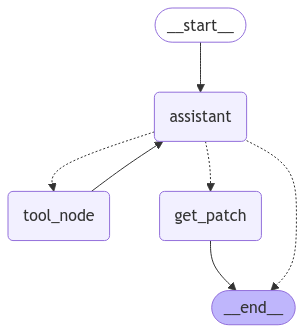

In [ ]:
from langchain_aws import ChatBedrockConverse
from langgraph.prebuilt.tool_node import ToolNode
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image
import prompt_templates as pt
from dotenv import load_dotenv
from botocore.config import Config
from typing import Annotated, List
import operator


load_dotenv("../.env")

llm = ChatBedrockConverse(
    model="us.anthropic.claude-3-5-sonnet-20240620-v1:0",
    # credentials_profile_name="ediewald+1111-Admin",
    config=Config(
        retries={"max_attempts": 100}
    ),
    region_name="us-east-1",
)

def submit():
    """Submit your changes once complete."""
    return env.get_patch()

tools = [
    code_editor.open_file,
    code_editor.scroll_up,
    code_editor.scroll_down,
    code_editor.ls,
    code_editor.search_files,
    code_editor.code_search,
    code_editor.edit_file,
    code_editor.run_python_file,
    code_editor.execute_command,
    code_editor.rm,
    submit
]

llm_with_tools = llm.bind_tools(tools)

class CodeReviewerState(MessagesState):
    patch: str
    trajectory: Annotated[List[str], operator.add]

def assistant(state: CodeReviewerState):
    # todo: collapse messages efficiently - e.g. remove failed tool calls
    next_message = llm_with_tools.invoke([pt.AGENT_INSTRUCTIONS] + state["messages"])
    return {
        "messages": [next_message],
        "trajectory": [next_message.pretty_print()]
    }
    
def get_patch(state: CodeReviewerState):
    patch = env.get_patch()
    return {"patch": patch}

def route_messages(state: CodeReviewerState):
    last_message = state["messages"][-1]
    if last_message and "submit" in [t.get("name") for t in last_message.tool_calls]:
        return "get_patch"  # Route to end
    else:
        return "tool_node"  # Route back to tool node
    
workflow = StateGraph(CodeReviewerState)

workflow.add_node("assistant", assistant)
workflow.add_node("tool_node", ToolNode(tools))
workflow.add_node("get_patch", get_patch)

# Define edges: these determine how the control flow moves
workflow.add_edge(START, "assistant")
workflow.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    route_messages,
)
workflow.add_edge("tool_node", "assistant")
workflow.add_edge("get_patch", END)
graph = workflow.compile()

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [6]:
from langchain_core.messages import HumanMessage

# code_editor.reset()

messages = [HumanMessage(content=pt.START_AGENT.format(
    repo=instance_details["repo"],
    problem_statement=instance_details["problem_statement"],
))]
# Start conversation
model_patch = None
for chunk in graph.stream({"messages": messages}, stream_mode="updates"):
    if "tool_node" in chunk:
        chunk["tool_node"]["messages"][-1].pretty_print()
    elif "assistant" in chunk:
        chunk["assistant"]["messages"][-1].pretty_print()
    elif "get_patch" in chunk:
        model_patch = chunk["get_patch"]["patch"]

if model_patch:
    print("GOT MODEL PATCH")
    print(model_patch)

================================== Ai Message ==================================

[{'type': 'text', 'text': "Certainly! I'll go through the process step-by-step to resolve this issue. Let's begin with reproducing the issue.\n\n1. REPRODUCE_ISSUE:\nFirst, I'll create a file to reproduce the issue."}, {'type': 'tool_use', 'name': 'edit_file', 'input': {'file_path': 'reproduce_issue.py', 'start_line': 1, 'end_line': 1, 'new_content': 'import pytest\n\n@pytest.mark.skip\ndef test_skip_location() -> None:\n    assert 0\n\nif __name__ == "__main__":\n    import sys\n    sys.exit(pytest.main([__file__, "-rs", "--runxfail"]))'}, 'id': 'tooluse_of1MB9rAR0Km50i4euAwqQ'}]
Tool Calls:
  edit_file (tooluse_of1MB9rAR0Km50i4euAwqQ)
 Call ID: tooluse_of1MB9rAR0Km50i4euAwqQ
  Args:
    file_path: reproduce_issue.py
    start_line: 1
    end_line: 1
    new_content: import pytest

@pytest.mark.skip
def test_skip_location() -> None:
    assert 0

if __name__ == "__main__":
    import sys
    sys.exit(pyt

KeyboardInterrupt: 

In [20]:
logs = """Traceback (most recent call last):
  File "reproduce_issue.py", line 25, in <module>
    django.setup()
  File "/testbed/django/__init__.py", line 24, in setup
    apps.populate(settings.INSTALLED_APPS)
  File "/testbed/django/apps/registry.py", line 122, in populate
    app_config.ready()
  File "/testbed/django/contrib/admin/apps.py", line 26, in ready
    self.module.autodiscover()
  File "/testbed/django/contrib/admin/__init__.py", line 24, in autodiscover
    autodiscover_modules('admin', register_to=site)
  File "/testbed/django/utils/module_loading.py", line 47, in autodiscover_modules
    import_module('%s.%s' % (app_config.name, module_to_search))
  File "/opt/miniconda3/envs/testbed/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/testbed/django/contrib/auth/admin.py", line 6, in <module>
    from django.contrib.auth.forms import (
  File "/testbed/django/contrib/auth/forms.py", line 11, in <module>
    from django.contrib.auth.tokens import default_token_generator
  File "/testbed/django/contrib/auth/tokens.py", line 107, in <module>
    default_token_generator = PasswordResetTokenGenerator()
  File "/testbed/django/contrib/auth/tokens.py", line 18, in __init__
    self.secret = self.secret or settings.SECRET_KEY
  File "/testbed/django/conf/__init__.py", line 91, in __getattr__
    raise ImproperlyConfigured("The SECRET_KEY setting must not be empty.")
django.core.exceptions.ImproperlyConfigured: The SECRET_KEY setting must not be empty."""
len(logs.splitlines())

32

In [18]:
log_lines = logs.splitlines()
if len(log_lines) > 50:
    trimmed_logs = "\n".join(log_lines[:25]) + "\n[...logs trimmed...'\n" + "\n".join(log_lines[-25:])
print(trimmed_logs)

"Running Sphinx v3.1.0+/752d3285d\nmaking output directory... done\n[autosummary] generating autosummary for: CONTRIBUTING.rst, README.rst, _templates/autosummary/module.rst, doc/authors.rst, doc/changes.rst, doc/code_of_conduct.rst, doc/contents.rst, doc/develop.rst, doc/development/tutorials/examples/README.rst, doc/development/tutorials/helloworld.rst, ..., tests/roots/test-toctree/bar.rst, tests/roots/test-toctree/baz.rst, tests/roots/test-toctree/foo.rst, tests/roots/test-toctree/index.rst, tests/roots/test-toctree/quux.rst, tests/roots/test-toctree/qux.rst, tests/roots/test-toctree/tocdepth.rst, tests/roots/test-trim_doctest_flags/index.rst, tests/roots/test-warnings/index.rst, tests/roots/test-warnings/undecodable.rst\nFailed to import 'autodoc_fodder': no module named autodoc_fodder\nFailed to import 'spam.mod3': no module named spam.mod3\nFailed to import 'noodle': no module named noodle\nFailed to import 'foo': no module named foo\nFailed to import 'noodle': no module named n

[b'E' b'E' b'E' b'E' b'E']


In [11]:
import numpy as np

def array_watcher(arr):
    # This function holds onto the reference of the array it's given
    def check_value():
        # Returns the first value in the array it's watching
        return arr[0]
    return check_value

# Test Case 1: Without [:]
arr1 = np.chararray(5)
arr1[:] = 'E'
watcher1 = array_watcher(arr1)  # watcher1 now holds reference to original array

print("Before replace - watcher1 sees:", watcher1())  # Should see 'E'
arr1 = arr1.replace(b'E', b'D')  # Creates new array
print("After replace - watcher1 sees:", watcher1())   # Still sees 'E'
print("After replace - arr1 is:", arr1[0])           # Shows 'D'

print("\n-------------------\n")

# Test Case 2: With [:]
arr2 = np.chararray(5)
arr2[:] = 'E'
watcher2 = array_watcher(arr2)  # watcher2 now holds reference to array

print("Before replace - watcher2 sees:", watcher2())  # Should see 'E'
arr2[:] = arr2.replace(b'E', b'D')  # Modifies in place
print("After replace - watcher2 sees:", watcher2())   # Sees 'D'
print("After replace - arr2 is:", arr2[0])           # Shows 'D'

Before replace - watcher1 sees: b'E'
After replace - watcher1 sees: b'E'
After replace - arr1 is: b'D'

-------------------

Before replace - watcher2 sees: b'E'
After replace - watcher2 sees: b'D'
After replace - arr2 is: b'D'
